# M3_AG1_PAÍSES EXTREMOS EN LA IMPLANTACIÓN DE FACEBOOK

**Estudiantes Grupo #9**
- Herrera Sarrias, Marcela
- Peredo Mescco, Elizabeth Evelin

## Preparación del entorno:

In [ ]:
#instalar paquetes y cargar librerías
install.packages("dplyr")
library(dplyr)
install.packages("tidyverse")
library(tidyverse)
install.packages("stringr")
library(stringr)
install.packages("ggplot2")
library(ggplot2)
install.packages("gridExtra")
library(gridExtra)
install.packages("ggpubr")
library(ggpubr)
install.packages("moments")
library(moments)
install.packages("MASS")
library(MASS)
install.packages("stargazer")
library(stargazer)
install.packages("boot")
library(boot)
install.packages("missForest")
library(missForest)
install.packages("VIM")
library(VIM)
install.packages("mice")
library(mice)
install.packages("Amelia")
library(Amelia)
install.packages('scales')
library(scales)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘textshaping’, ‘ragg’


Warning message in install.packages("tidyverse"):
“installation of package ‘textshaping’ had non-zero exit status”
Warning message in install.packages("tidyverse"):
“installation of package ‘ragg’ had non-zero exit status”
Warning message in install.packages("tidyverse"):
“installation of package ‘tidyverse’ had non-zero exit status”
Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/

## Carga y preparación del fichero:

In [ ]:
#descargar archivo desde github
download.file("https://raw.githubusercontent.com/griu/mbdds_fc20/master/gestion_datos/www/fb_long.csv", "/content/dnld_direct_from_web.csv") #"/content" es el working directory

In [ ]:
#abrir fichero
data <- read.csv("/content/dnld_direct_from_web.csv", sep = ";")
#reemplazar "," por "." para los decimales
data$Internet_por_num <- gsub(",",".", data$Internet_por_num) 
#convertir variable a tipo numeric
data$Internet_por_num <- as.numeric(data$Internet_por_num) 
#visualizar primeras 5 líneas del dataframe
head(data, 5)

,pais_r,Facebook_num,Internet_por_num,poblacion_num,anyo
,<chr>,<int>,<dbl>,<int>,<int>
1,Algeria,928100,12.50,35977455,2010
2,Argentina,10542040,45.00,40788453,2010
3,Australia,9009660,76.00,22031750,2010
4,Austria,2084840,75.17,8363404,2010
5,"Bahamas, The",139460,43.00,354942,2010


Diccionario de variables:
*   **pais_r**: nombre del país
*   **anyo**: 2010 o 2018
*   **Facebook_num**: total de usuarios de Facebook en el país y año
*   **Internet_por_num**: porcentaje de población usuaria de internet sobre el total de la población
*   **poblacion**: total de población de cada país

### PALETA DE COLORES Y TEMA

In [ ]:
boxplot_colors <- c("lightskyblue", "plum")
border_colors <- c("royalblue4", "purple4")
point_colors <- c("royalblue4", "purple4")

color1 <- c("royalblue4", "purple4")
color2 <- c("lightskyblue", "plum")

theme <- theme(plot.title = element_text(colour = "black", face = "bold", size = 18, hjust = 0.5),
        axis.title = element_text(colour = "black", face = "bold", size = 12),
        axis.text.x = element_text(colour = "black", size = 12),
        axis.ticks.x = element_line(colour = "black", linewidth = 0.5),
        axis.text.y = element_blank(), 
        axis.ticks.y = element_blank(),
        panel.grid.major = element_blank(), 
        panel.grid.minor = element_blank(),
        panel.border = element_rect(fill = NA, colour = "black", linewidth = 0.8))

# **1. Calcula la variable “Facebook_por_Internet”= “Porcentaje de usuarios de Facebook sobre el total de usuarios de internet” (para cada país y año). Presenta y comenta el summary de esta variable.**

**COMENTARIO:** 

Para calcular la variable **Facebook_por_Internet** primero debemos calcular el número de usuarios de internet (**Internet_num**) como el producto de la población por el porcentaje de población usuaria de internet de cada país. 

In [ ]:
#calcular número de usuarios de internet
data$Internet_num <- round(as.numeric(data$poblacion_num) * as.numeric(data$Internet_por_num) / 100)
#calcular porcentaje de usuarios de Facebook
data$Facebook_por_Internet <- round(as.numeric(data$Facebook_num) * 100 / as.numeric(data$Internet_num), 2) 
#calcular porcentaje de usuarios de Facebook sobre población total
data$Facebook_por_num <- round(as.numeric(data$Facebook_num) * 100 / as.numeric(data$poblacion), 2) 
data <- data
#ver summary de variable nueva
summary(data$Facebook_por_Internet)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
   0.03   25.82   55.19   50.94   71.19  122.07       1 

In [ ]:
#ver valor faltante
data %>% filter(is.na(data$Facebook_por_Internet))

pais_r,Facebook_num,Internet_por_num,poblacion_num,anyo,Internet_num,Facebook_por_Internet,Facebook_por_num
<chr>,<int>,<dbl>,<int>,<int>,<dbl>,<dbl>,<dbl>
Taiwan,6745160,NA,23140948,2010,NA,NA,29.15


**COMENTARIO:**

La función **summary()** nos muestra las estadísticas resumidas de la variable **Facebook_por_Internet**:

*   **Min**: el valor mínimo es 0.03
*   **1er Qu**: el primer cuartil es 25,82, o sea, el 25% de las observaciones de esta variable son menores o iguales a 25.82
*   **Mediana**: la mediana de la variable es 55.19, o sea, el 50% de las observaciones de esta variable son menores o iguales a 55.19
*   **Media**: el valor promedio de todas las observaciones para esta variable es 50.94
*   **3er Qu**: el tercer cuartil de la variable es 71.19, o sea, el 75% de las observaciones de esta variable son menores o iguales a 71.19
*   **Máx**: el valor máximo de esta variable es 122.07
*   **NA's**: hay un valor faltante (que corresponde a Taiwan)

En resumen, la variable **Facebook_por_Internet** tiene un rango de valores de 0.03 a 122.07, con una mediana de 55.19 y una media de 50.94. Al ser la mediana mayor a la media y el primer cuartil (25.82) más cerca del valor mínimo que el tercer cuartil (71.19) del valor máximo, podemos suponer que la distribución de esta variable tiene una asimetría negativa (es decir, hay una mayor concentración de valores hacia el lado derecho de la distribución).

# **2. Dibuja y comenta, mediante el boxplot, si hay (o no) países outliers respecto a la variable Facebook_por_Internet.**

**COMENTARIO:**

Idealmente cuando tenemos valores faltantes (NA) imputamos un valor para así no eliminar la observación del dataset. Para efectos de esta práctica sin embargo, eliminamos el valor faltante correspondiente a Taiwan para resolver los ejercicios 2-6 (se pide imputar el valor hasta el ejercicio 7).

In [ ]:
#eliminar valores faltantes 
new_data <- na.omit(data)

In [ ]:
#analizar presencia de outliers
stats <- boxplot.stats(new_data$Facebook_por_Internet)
stats #vemos que no hay valores atípicos

$stats
[1]   0.030  25.815  55.190  71.185 122.070

$n
[1] 155

$conf
[1] 49.43215 60.94785

$out
numeric(0)

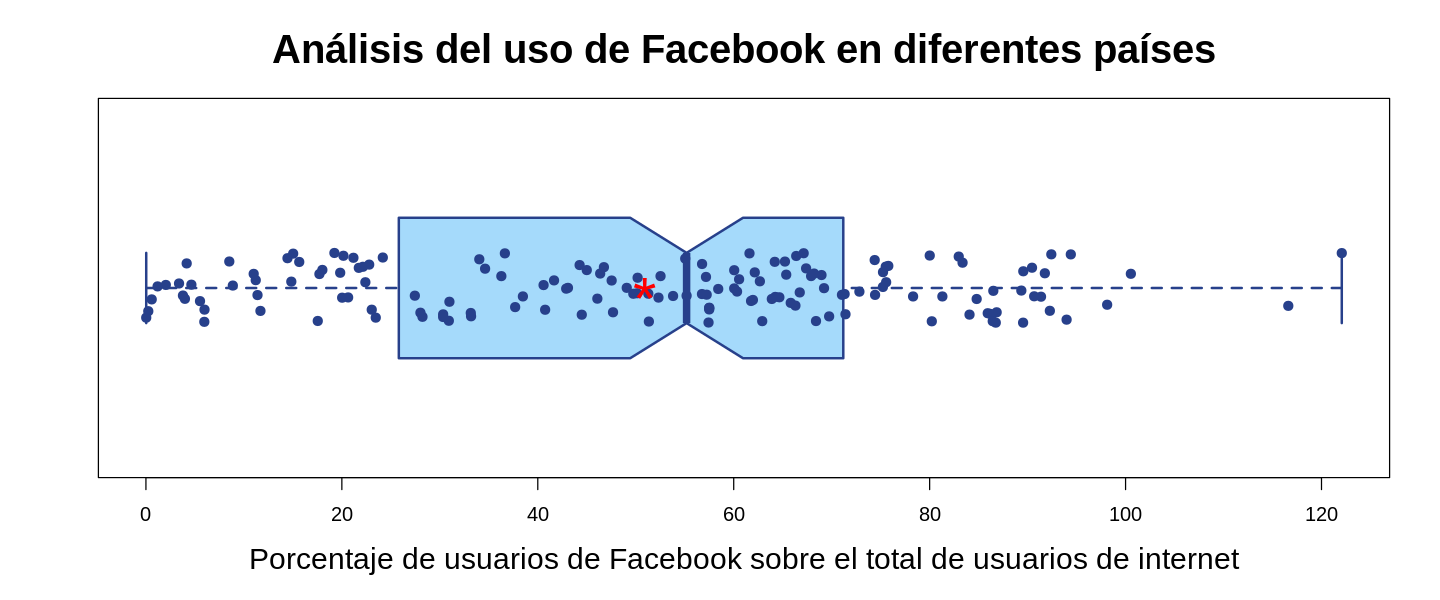

In [ ]:
options(repr.plot.width = 12, repr.plot.height = 5)
#graficar boxplot
boxplot(new_data$Facebook_por_Internet, horizontal = TRUE, notch = TRUE, outcol = "white",
        main = "Análisis del uso de Facebook en diferentes países", 
        ylab = "", xlab = "Porcentaje de usuarios de Facebook sobre el total de usuarios de internet", 
        cex.lab = 1.5, cex.main = 2, axes = TRUE, 
        lwd = 2, col = rgb(135/255, 206/255, 250/255, alpha = 0.75), border = color1[1])
#agregar datapoints en el boxplot
points(y = jitter(rep(1, length(new_data$Facebook_por_Internet)), amount = 0.1), 
       x = new_data$Facebook_por_Internet, 
       pch = 19, col = color1[1])
#agregar valor medio
points(x = mean(new_data$Facebook_por_Internet), y = 1, pch = "*", col = "red", cex = 3)       

**COMENTARIO:**

Aquí, el análisis de boxplot no muestra la presencia de valores atípicos para el porcentaje de usuarios de Facebook. Es decir, no hay países con porcentaje de usuarios de Facebook extremedamente bajo o alto. Con este análisis también podemos observar claramente una distribución asimétrica con un sesgo negativo. También vemos que la mediana (línea vertical que coincide con la muesca) es mayor al valor medio (representado por una estrella roja). 

####**Análisis del uso de Facebook por año:**

In [ ]:
#ver outliers por año
stats_anyo <- by(new_data$Facebook_por_Internet, new_data$anyo, boxplot.stats)
stats_anyo #si analizamos la variable por año vemos 6 outliers para 2018

new_data$anyo: 2010
$stats
[1]  0.03 18.01 34.03 52.32 98.12

$n
[1] 77

$conf
[1] 27.85222 40.20778

$out
numeric(0)

------------------------------------------------------------ 
new_data$anyo: 2018
$stats
[1]  22.15  57.17  68.05  83.36 122.07

$n
[1] 78

$conf
[1] 63.36461 72.73539

$out
[1]  0.24 17.71 11.21  8.51 15.03  4.64


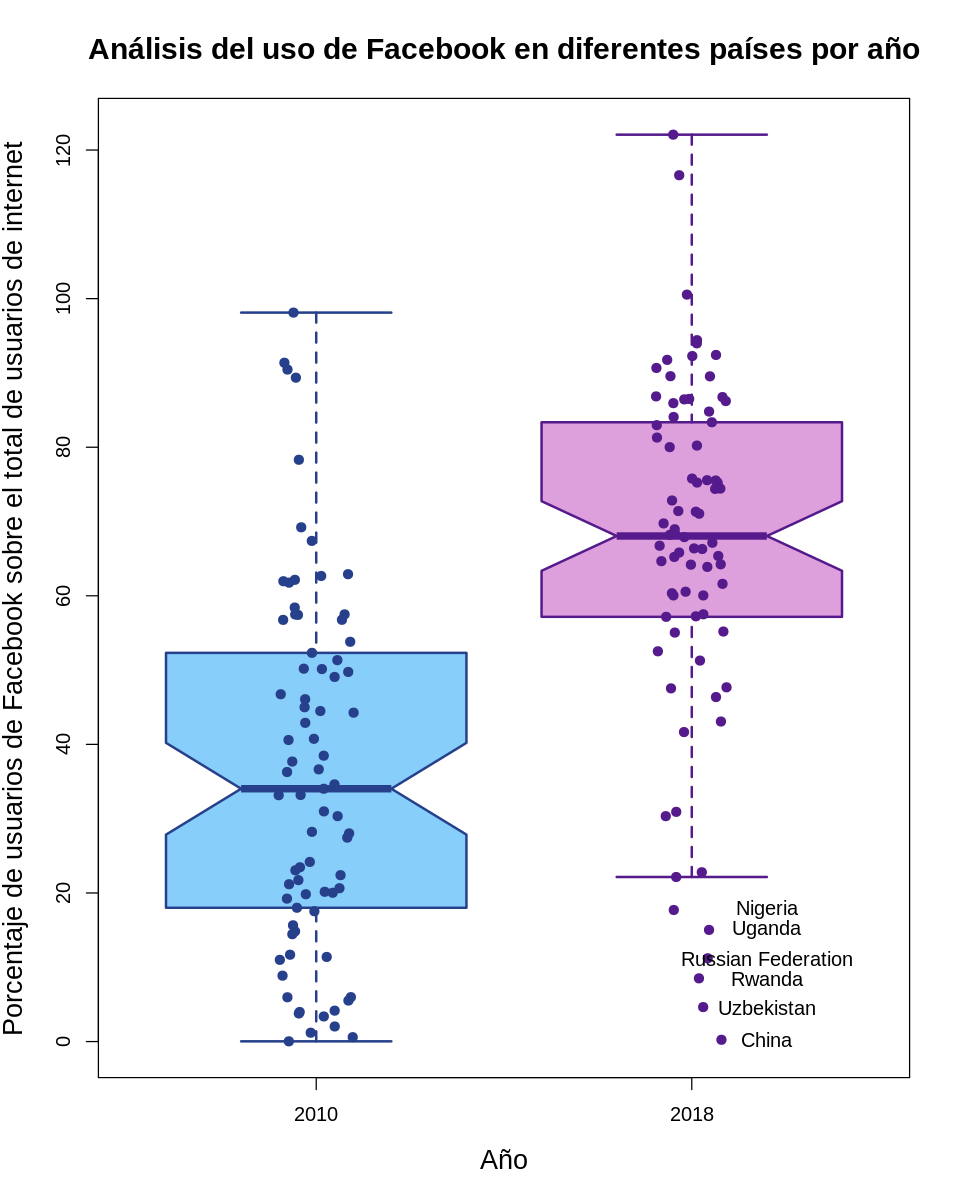

In [ ]:
#análisis de boxplot por año
options(repr.plot.width = 8, repr.plot.height = 10)
#graficar boxplots por año
bp <- boxplot(new_data$Facebook_por_Internet ~ new_data$anyo, data = new_data, notch = TRUE, outcol = "white",
        main = "Análisis del uso de Facebook en diferentes países por año",
        xlab = "Año", ylab = "Porcentaje de usuarios de Facebook sobre el total de usuarios de internet", 
        cex.main = 1.5, cex.lab = 1.35, 
        lwd = 2, col = color2, border = color1) 
#agregar puntos
stripchart(new_data$Facebook_por_Internet ~ new_data$anyo, vertical = TRUE, method = "jitter", 
           pch = 19, add = TRUE, col = point_colors)        
#mostrar etiquetas en los outliers
outliers <- lapply(stats_anyo, function(x) which(new_data$Facebook_por_Internet %in% x$out)) 
out_positions <- bp$group + 0.2
outlier_indices <- unlist(outliers)
text(out_positions, new_data$Facebook_por_Internet[outlier_indices], labels = new_data$pais_r[outlier_indices])

**COMENTARIO:**

Al analizar el porcentaje de usuarios de Facebook por año, detectamos 6 valores atípicos para el 2018. Es decir, el porcentaje de uso de Facebook para 6 países (Nigeria, Uganda, Rusia, Rwanda, Uzbekistan y China) en el año 2018 es extremedamente bajo en comparación con la media global.

# **3. Ajusta, de nuevo, los modelos de la actividad 2 de Facebook_por_num sobre Internet_por_num separados por año. Dibuja el primer plot (es decir, plot(modelo 1)) del modelo de regresión de cada año. Comenta si observas países con valores outliers en 2010. ¿Y en 2018?**
Consejo: antes de ajustar los modelos, introduce, en el rowname del data frame, la concatenación del nombre, el país y el año.

In [ ]:
#calcular porcentaje de usuarios de Facebook sobre población total
new_data$Facebook_por_num <- round(as.numeric(new_data$Facebook_num) * 100 / as.numeric(new_data$poblacion), 2)
new_data <- new_data

In [ ]:
#formatear los nombres
rownames(new_data) <- paste(new_data$pais_r, "-", new_data$anyo, sep = "")

####**Análisis de outliers:**

In [ ]:
#ver valores atípicos para el porcentaje de usuarios de Facebook por país y año
stats_anyo1 <- by(new_data$Facebook_por_num, new_data$anyo, boxplot.stats)
outliers1 <- lapply(stats_anyo1, function(x) which(new_data$Facebook_por_num %in% x$out))
outlier_indices1 <- unlist(outliers1)
outliers_facebook <- new_data[outlier_indices1, c("Facebook_por_num")]
outliers_facebook <- cbind(rownames(new_data)[outlier_indices1], outliers_facebook)
colnames(outliers_facebook)[1] <- "Row Names"

#ver valores atípicos para el porcentaje de usuarios de Internet por país y año
stats_anyo2 <- by(new_data$Internet_por_num, new_data$anyo, boxplot.stats)
outliers2 <- lapply(stats_anyo2, function(x) which(new_data$Internet_por_num %in% x$out))
outlier_indices2 <- unlist(outliers2)
outliers_internet <- new_data[outlier_indices2, c("Internet_num")]
outliers_internet  <- cbind(rownames(new_data)[outlier_indices2], outliers_internet)
colnames(outliers_internet )[1] <- "Row Names"

#ver todos los outliers ordenados por año
all_outliers <- merge(outliers_facebook, outliers_internet, by = "Row Names", all = TRUE)
all_outliers$anyo <- substr(all_outliers$`Row Names`, nchar(all_outliers$"Row Names")-3, nchar(all_outliers$"Row Names"))
all_outliers <- arrange(all_outliers, anyo)
all_outliers <- all_outliers[, -ncol(all_outliers)]
all_outliers

Row Names,outliers_facebook,outliers_internet
<chr>,<chr>,<chr>
Brazil-2010,2.43,NA
Iceland-2010,83.45,NA
China-2018,0.13,NA
Ethiopia-2018,4.12,NA
Nigeria-2018,8.68,NA
Rwanda-2018,3.98,NA
Uganda-2018,6.09,NA
Uzbekistan-2018,2.43,NA
"Yemen, Rep.-2018",8.26,NA


**COMENTARIO:**

Aquí vemos que hay 9 outliers para **Facebook_por_num** (2 en 2010 y 7 en 2018) y 0 para **Internet_por_num**. Transformar la distribución de los datos puede ayudar a reducir el impacto de los outliers. Para hacer esto vamos entonces a hacer un análisis univariante de las variables (separadas por año) y probar distintas transformaciones.

####**Transformación de variables:**

In [ ]:
#ver estadísticos para las variables por año
rbind(data.frame(variable = "Internet_por_num", x = new_data$Internet_por_num, anyo = new_data$anyo),
    data.frame(variable = "Facebook_por_num", x = new_data$Facebook_por_num, anyo = new_data$anyo)) %>%
  group_by(variable, anyo) %>%
  summarise(
    media = mean(x),
    sd = sd(x),
    CV = sd(x) / mean(x),
    asimetría = skewness(x),
    curtosis = kurtosis(x),
    mínimo = min(x),
    Q25 = quantile(x, 0.25),
    mediana = median(x),
    Q75 = quantile(x, 0.75),
    máximo = max(x),
    .groups = "drop") %>%
  pivot_longer(cols = c(-1, -2), names_to = "Métrica", values_to = "Valor") %>%
  arrange(desc(variable), anyo) %>%
  pivot_wider(names_from = c(variable, anyo), values_from = Valor)

Métrica,Internet_por_num_2010,Internet_por_num_2018,Facebook_por_num_2010,Facebook_por_num_2018
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
media,48.1778935,73.2542833,19.1548052,48.8592308
sd,27.2417551,20.5020583,16.7624377,21.1224327
CV,0.5654410,0.2798752,0.8751035,0.4323120
asimetría,-0.0807767,-0.8145010,0.8943939,-0.7127628
curtosis,1.7888055,2.8487250,4.0653908,2.9001266
mínimo,0.7500000,18.6000000,0.0100000,0.1300000
Q25,25.0000000,58.8420485,2.9000000,42.2250000
mediana,45.0000000,78.8749883,17.0800000,53.3200000
Q75,71.6900000,88.8312361,28.5500000,63.3800000


**COMENTARIO:**

Basado en el análisis anterior, podemos probamos las siguientes transformaciones con el fin de eliminar outliers:

*   **Internet_por_num_2010**: no transformamos ya que la distribución parece ser muy cercana a normal
*   **Facebook_por_num_2010**: tiene asimetría positiva, aplicamos raíz cuadrada (*sqrt(x)*) o logaritmo (*log(x)*)
*   **Internet_por_num_2018**: tiene asimetría negativa, elevamos al cuadrado  (*x^2*)
*   **Facebook_por_num_2018**: tiene asimetría negativa, elevamos al cuadrado (*x^2*)

In [ ]:
#crear nuevos dataframes por año
anyo2010 <- subset(new_data, anyo == 2010) %>% 
  rename(pais_r = pais_r, Facebook_num_2010 = Facebook_num, 
            Internet_por_num_2010 = Internet_por_num, poblacion_num_2010 = poblacion_num, Internet_num_2010 = Internet_num,
            Facebook_por_Internet_2010 = Facebook_por_Internet, Facebook_por_num_2010 = Facebook_por_num)
            
anyo2018 <- subset(new_data, anyo == 2018) %>% 
  rename(pais_r = pais_r, Facebook_num_2018 = Facebook_num, 
            Internet_por_num_2018 = Internet_por_num, poblacion_num_2018 = poblacion_num, Internet_num_2018 = Internet_num,
            Facebook_por_Internet_2018 = Facebook_por_Internet, Facebook_por_num_2018 = Facebook_por_num)

#probar distintas transformaciones y rescalar
anyo2010t <- anyo2010 %>% mutate(Internet_por_num_2010_2 = rescale((Internet_por_num_2010)^2, to = c(0, 100)),
         log_Facebook_por_num_2010 = rescale(log(Facebook_por_num_2010), to = c(0, 100)), 
         sqrt_Facebook_por_num_2010 = rescale(sqrt(Facebook_por_num_2010), to = c(0, 100)))
                
anyo2018t <- anyo2018 %>% mutate(Internet_por_num_2018_2 = rescale((Internet_por_num_2018)^2, to = c(0, 100)),
            Facebook_por_num_2018_2 = rescale((Facebook_por_num_2018)^2, to = c(0, 100)))

In [ ]:
#comparar estadisticos 2010 antes y después de transformar
order <- c("Internet_por_num_2010", "Internet_por_num_2010_2", "Facebook_por_num_2010", "log_Facebook_por_num_2010", "sqrt_Facebook_por_num_2010")

rbind(data.frame(variable = "Internet_por_num_2010", x = anyo2010t$Internet_por_num_2010),
  data.frame(variable = "Internet_por_num_2010_2", x = anyo2010t$Internet_por_num_2010_2),
  data.frame(variable = "Facebook_por_num_2010", x = anyo2010t$Facebook_por_num_2010),
  data.frame(variable = "log_Facebook_por_num_2010", x = anyo2010t$log_Facebook_por_num_2010),
  data.frame(variable = "sqrt_Facebook_por_num_2010", x = anyo2010t$sqrt_Facebook_por_num_2010)) %>%
  mutate(variable = factor(variable, levels = order)) %>%
  group_by(variable) %>%
  summarise(
    media = mean(x),
    sd = sd(x),
    CV = sd(x) / mean(x),
    asimetría = skewness(x),
    curtosis = kurtosis(x),
    mínimo = min(x),
    Q25 = quantile(x, 0.25),
    mediana = median(x),
    Q75 = quantile(x, 0.75),
    máximo = max(x),
    NAs = sum(is.na(x))) %>%
  pivot_longer(cols = -1, names_to = "Métrica", values_to = "Valor") %>%
  arrange(variable) %>%
  pivot_wider(names_from = c(variable), values_from = Valor)

Métrica,Internet_por_num_2010,Internet_por_num_2010_2,Facebook_por_num_2010,log_Facebook_por_num_2010,sqrt_Facebook_por_num_2010
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
media,48.1778935,35.0071888,19.1548052,74.7576635,41.15860058
sd,27.2417551,30.3507541,16.7624377,19.5139064,23.82142261
CV,0.5654410,0.8669863,0.8751035,0.2610288,0.57877144
asimetría,-0.0807767,0.5437592,0.8943939,-1.3641228,-0.06702525
curtosis,1.7888055,2.0365268,4.0653908,4.7281845,1.98741030
mínimo,0.7500000,0.0000000,0.0100000,0.0000000,0.00000000
Q25,25.0000000,7.1600530,2.9000000,62.7934273,17.74124406
mediana,45.0000000,23.2130193,17.0800000,82.4314315,44.63477919
Q75,71.6900000,58.9246329,28.5500000,88.1211532,58.03169478


In [ ]:
#comparar estadisticos 2018 antes y después de transformar
order <- c("Internet_por_num_2018", "Internet_por_num_2018_2", "Facebook_por_num_2018", "Facebook_por_num_2018_2")

rbind(data.frame(variable = "Internet_por_num_2018", x = anyo2018t$Internet_por_num_2018),
  data.frame(variable = "Internet_por_num_2018_2", x = anyo2018t$Internet_por_num_2018_2),
  data.frame(variable = "Facebook_por_num_2018", x = anyo2018t$Facebook_por_num_2018),
  data.frame(variable = "Facebook_por_num_2018_2", x = anyo2018t$Facebook_por_num_2018_2)) %>%
  mutate(variable = factor(variable, levels = order)) %>%
  group_by(variable) %>%
  summarise(
    media = mean(x),
    sd = sd(x),
    CV = sd(x) / mean(x),
    asimetría = skewness(x),
    curtosis = kurtosis(x),
    mínimo = min(x),
    Q25 = quantile(x, 0.25),
    mediana = median(x),
    Q75 = quantile(x, 0.75),
    máximo = max(x)) %>%
  pivot_longer(cols = -1, names_to = "Métrica", values_to = "Valor") %>%
  arrange(variable) %>%
  pivot_wider(names_from = c(variable), values_from = Valor)

Métrica,Internet_por_num_2018,Internet_por_num_2018_2,Facebook_por_num_2018,Facebook_por_num_2018_2
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
media,73.2542833,56.7066086,48.8592308,34.6546664
sd,20.5020583,28.1916729,21.1224327,22.3624076
CV,0.2798752,0.4971497,0.4323120,0.6452928
asimetría,-0.8145010,-0.3102737,-0.7127628,0.3583113
curtosis,2.8487250,1.9891752,2.9001266,2.9528867
mínimo,18.6000000,0.0000000,0.1300000,0.0000000
Q25,58.8420485,32.5163873,42.2250000,21.8570690
mediana,78.8749883,61.3065697,53.3200000,34.8430221
Q75,88.8312361,78.7193649,63.3800000,49.2382161


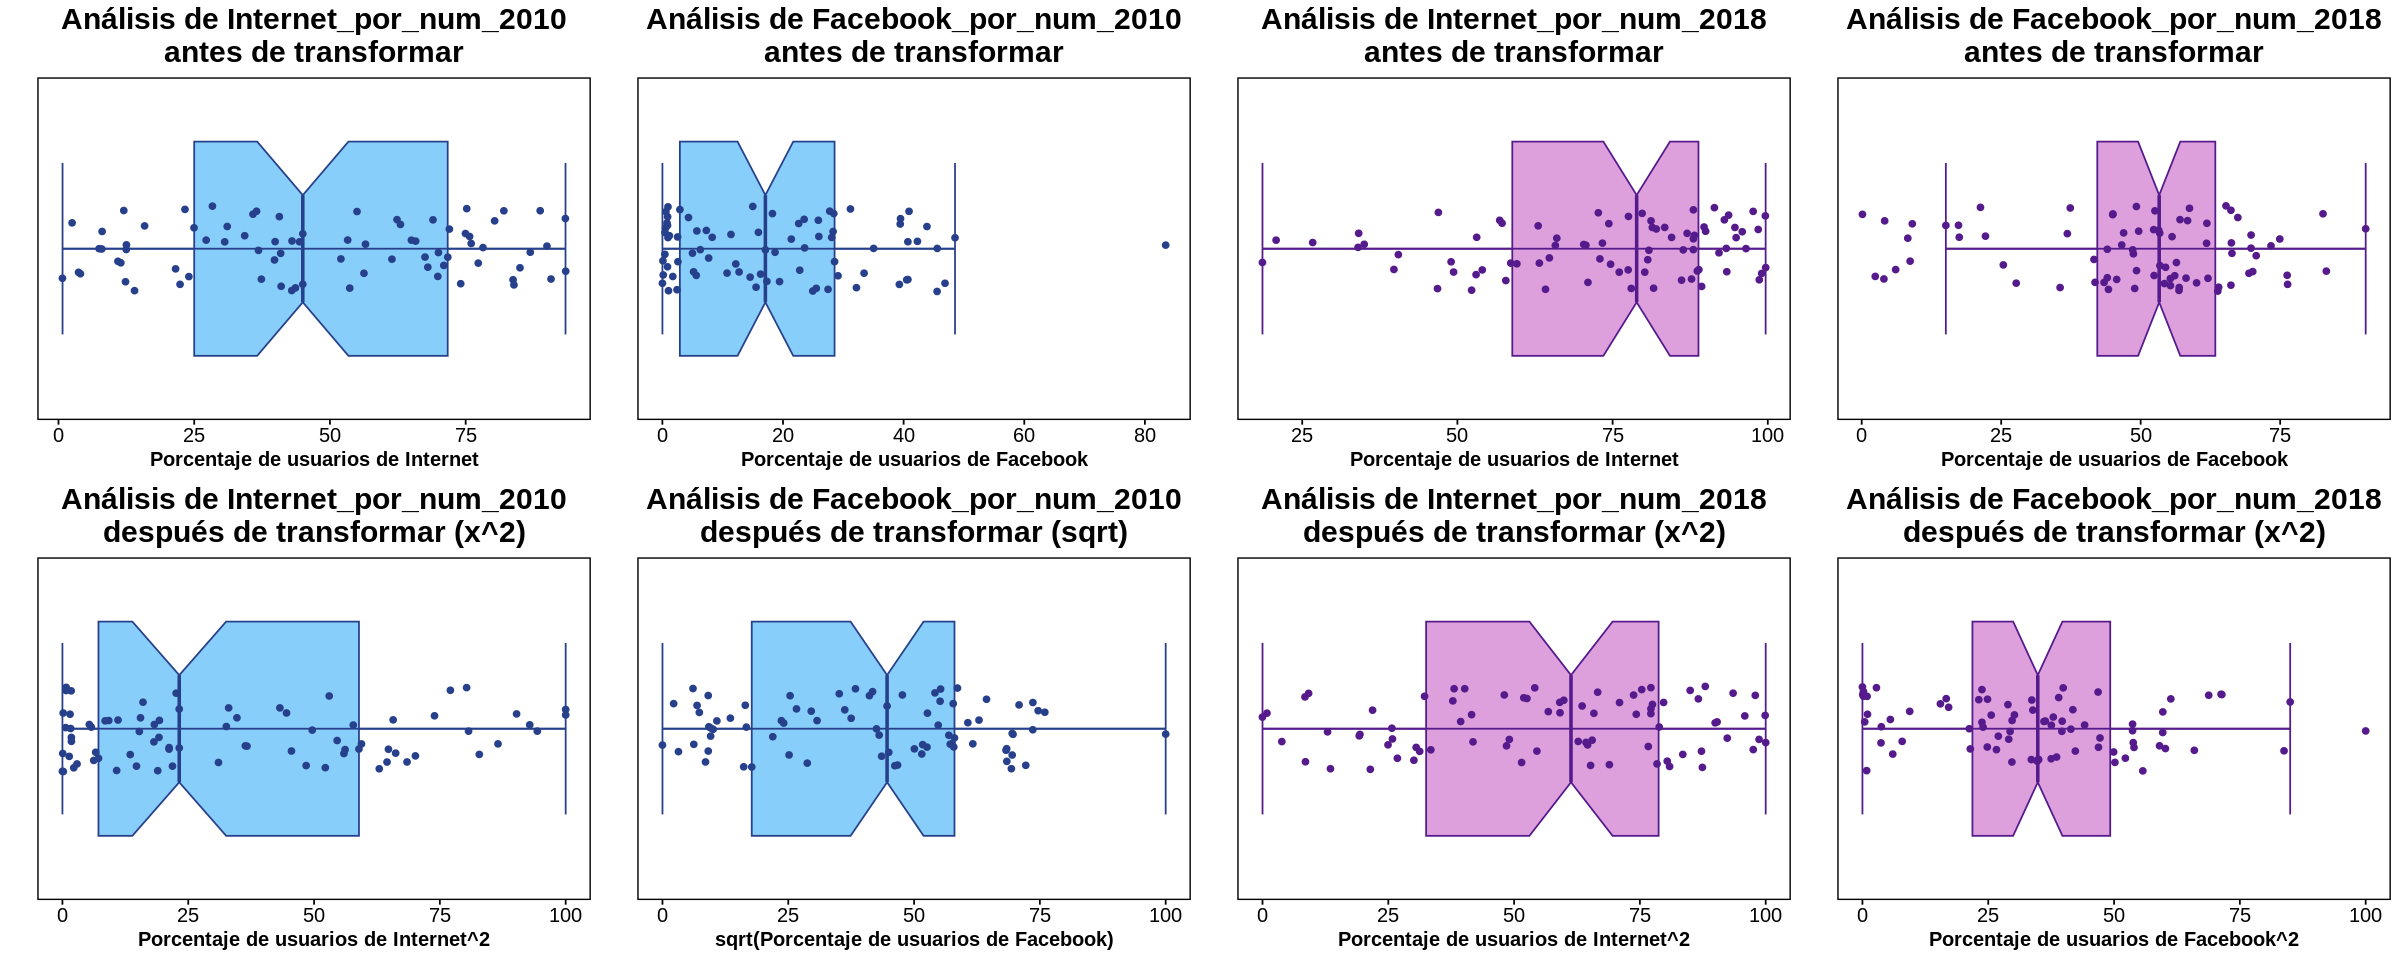

In [ ]:
#hacer análisis de boxplot antes y después de aplicar transformaciones 
options(repr.plot.width = 20, repr.plot.height = 8)

p1 <- ggplot(anyo2010t, aes(x = factor(0), y = Internet_por_num_2010)) + 
  geom_boxplot(outlier.colour = "white", color = color1[1], fill = color2[1], notch = TRUE) + coord_flip() +
  geom_jitter(width = 0.15, color = color1[1]) +
  stat_boxplot(geom = "errorbar", width = 0.6, color = color1[1]) +
  #stat_summary(fun = mean, geom = "point", shape = "*", size = 10, color = "red") + 
  xlab("") + ylab("Porcentaje de usuarios de Internet") +
  ggtitle(str_wrap("Análisis de Internet_por_num_2010 antes de transformar", 33)) +
  theme_bw() + theme 

p2 <- ggplot(anyo2010t, aes(x = factor(0), y = Facebook_por_num_2010)) + 
  geom_boxplot(outlier.colour = "white", color = color1[1], fill = color2[1], notch = TRUE) + coord_flip() +
  geom_jitter(width = 0.15, color = color1[1]) +
  stat_boxplot(geom = "errorbar", width = 0.6, color = color1[1]) +
  #stat_summary(fun = mean, geom = "point", shape = "*", size = 10, color = "red") + 
  xlab("") + ylab("Porcentaje de usuarios de Facebook") +
  ggtitle(str_wrap("Análisis de Facebook_por_num_2010 antes de transformar", 33)) +
  theme_bw() + theme 

p3 <- ggplot(anyo2018t, aes(x = factor(0), y = Internet_por_num_2018)) + 
  geom_boxplot(outlier.colour = "white", color = color1[2], fill = color2[2], notch = TRUE) + coord_flip() +
  geom_jitter(width = 0.15, color = color1[2]) +
  stat_boxplot(geom = "errorbar", width = 0.6, color = color1[2]) +
  #stat_summary(fun = mean, geom = "point", shape = "*", size = 10, color = "red") + 
  xlab("") + ylab("Porcentaje de usuarios de Internet") +
  ggtitle(str_wrap("Análisis de Internet_por_num_2018 antes de transformar", 33)) +
  theme_bw() + theme 

p4 <- ggplot(anyo2018t, aes(x = factor(0), y = Facebook_por_num_2018)) + 
  geom_boxplot(outlier.colour = "white", color = color1[2], fill = color2[2], notch = TRUE) + coord_flip() +
  geom_jitter(width = 0.15, color = color1[2]) +
  stat_boxplot(geom = "errorbar", width = 0.6, color = color1[2]) +
  #stat_summary(fun = mean, geom = "point", shape = "*", size = 10, color = "red") + 
  xlab("") + ylab("Porcentaje de usuarios de Facebook") +
  ggtitle(str_wrap("Análisis de Facebook_por_num_2018 antes de transformar", 33)) +
  theme_bw() + theme 

p5 <- ggplot(anyo2010t, aes(x = factor(0), y = Internet_por_num_2010_2)) + 
  geom_boxplot(outlier.colour = "white", color = color1[1], fill = color2[1], notch = TRUE) + coord_flip() +
  geom_jitter(width = 0.15, color = color1[1]) +
  stat_boxplot(geom = "errorbar", width = 0.6, color = color1[1]) +
  #stat_summary(fun = mean, geom = "point", shape = "*", size = 10, color = "red") + 
  xlab("") + ylab("Porcentaje de usuarios de Internet^2") +
  ggtitle(str_wrap("Análisis de Internet_por_num_2010 después de transformar (x^2)", 33)) +
  theme_bw() + theme 

p6 <- ggplot(anyo2010t, aes(x = factor(0), y = sqrt_Facebook_por_num_2010)) + 
  geom_boxplot(outlier.colour = "white", color = color1[1], fill = color2[1], notch = TRUE) + coord_flip() +
  geom_jitter(width = 0.15, color = color1[1]) +
  stat_boxplot(geom = "errorbar", width = 0.6, color = color1[1]) +
  #stat_summary(fun = mean, geom = "point", shape = "*", size = 10, color = "red") + 
  xlab("") + ylab("sqrt(Porcentaje de usuarios de Facebook)") +
  ggtitle(str_wrap("Análisis de Facebook_por_num_2010 después de transformar (sqrt)", 33)) +
  theme_bw() + theme 

p7 <- ggplot(anyo2018t, aes(x = factor(0), y = Internet_por_num_2018_2)) + 
  geom_boxplot(outlier.colour = "white", color = color1[2], fill = color2[2], notch = TRUE) + coord_flip() +
  geom_jitter(width = 0.15, color = color1[2]) +
  stat_boxplot(geom = "errorbar", width = 0.6, color = color1[2]) +
  #stat_summary(fun = mean, geom = "point", shape = "*", size = 10, color = "red") + 
  xlab("") + ylab("Porcentaje de usuarios de Internet^2") +
  ggtitle(str_wrap("Análisis de Internet_por_num_2018 después de transformar (x^2)", 33)) +
  theme_bw() + theme 

p8 <- ggplot(anyo2018t, aes(x = factor(0), y = Facebook_por_num_2018_2)) + 
  geom_boxplot(outlier.colour = "white", color = color1[2], fill = color2[2], notch = TRUE) + coord_flip() +
  geom_jitter(width = 0.15, color = color1[2]) +
  stat_boxplot(geom = "errorbar", width = 0.6, color = color1[2]) +
  #stat_summary(fun = mean, geom = "point", shape = "*", size = 10, color = "red") + 
  xlab("") + ylab("Porcentaje de usuarios de Facebook^2") +
  ggtitle(str_wrap("Análisis de Facebook_por_num_2018 después de transformar (x^2)", 33)) +
  theme_bw() + theme 

grid.arrange(p1, p2, p3, p4, p5, p6, p7, p8, nrow = 2, ncol = 4)

####**Análisis de outliers después de haber transformado las variables:**

**COMENTARIO:**

Efectivamente podemos ver (en los boxplots de la sección anterior y el análisis de outlier a continuación) como transformar las variables mejora la distribución de valores y reduce el efector distorsionador de/elimina outliers. 

En el caso de la variable **Facebook_por_num_2010** (para la cuál detectamos 2 outliers anteriormente), la distribución mejora significativamente. Por otro lado, para la variable **Facebook_por_num_2018**, vemos como elevarla al cuadrado elimina la mayoría de los (7) outliers y también parece mejorar la distribución. 

Sin embargo, es importante notar que cuando se aplican transformaciones en regresiones lineales, se está cambiando la escala de la relación entre la variable predictotra y la variable respuesta. Transformar ambas variables puede introducir colinealidad o ruido en el modelo y generar estimaciones poco confiables. En este caso, sabemos (de análisis previos en la tarea anterior) que no es conveniente transformar la variable **Facebook_por_num_2018**. Dado lo anterior, de aquí en adelante usaremos transformaciones para **Internet_por_num_2018** y **Facebook_por_num_2010** únicamente.

In [ ]:
#transformación de Internet_por_num y Facebook_por_num según el año en una sola matriz
df_trans <- na.omit(new_data)

df_trans$Internet_por_num_t <- ifelse(df_trans$anyo == 2010, df_trans$Internet_por_num,
                                    rescale(df_trans$Internet_por_num^2,to=c(0,100)))

df_trans$Facebook_por_num_t <- ifelse(df_trans$anyo == 2010, rescale(sqrt(df_trans$Facebook_por_num),to=c(0,100)),
                                    rescale(df_trans$Facebook_por_num,to=c(0,100)))

In [ ]:
#ver outliers Internet_por_num_2018 después de haber aplicado transformaciones
stats_int2018 <- boxplot.stats(anyo2018t$Internet_por_num_2018_2)
out_int2018 <- stats_int2018$out
out_int2018_indices <- which(anyo2018t$Internet_por_num_2018_2 %in% out_int2018)
out_int2018_rows <- rownames(anyo2018t)[out_int2018_indices]
outliers_internet2018 <- data.frame(Row_Names = rownames(anyo2018t)[out_int2018_indices], 
  Facebook_por_num_2018_2 = anyo2018t$Internet_por_num_2018_2[out_int2018_indices])
outliers_internet2018 #sigue habiendo 0 outliers

Row_Names,Facebook_por_num_2018_2
<chr>,<dbl>


In [ ]:
#ver outliers Facebook_por_num_2010 después de haber aplicado transformaciones
stats_fb2010 <- boxplot.stats(anyo2010t$sqrt_Facebook_por_num_2010)
out_fb2010 <- stats_fb2010$out
out_fb2010_indices <- which(anyo2010t$sqrt_Facebook_por_num_2010 %in% out_fb2010)
out_fb2010_rows <- rownames(anyo2010t)[out_fb2010_indices]
outliers_facebook2010 <- data.frame(Row_Names = rownames(anyo2010t)[out_fb2010_indices], 
  sqrt_Facebook_por_num_2010 = anyo2010t$sqrt_Facebook_por_num_2010[out_fb2010_indices])
 outliers_facebook2010 #pasamos de 2 a 0 outliers

Row_Names,sqrt_Facebook_por_num_2010
<chr>,<dbl>


In [ ]:
#ver outliers Facebook_por_num_2018 después de haber aplicado transformaciones
stats_fb2018 <- boxplot.stats(anyo2018t$sqrt_Facebook_por_num_2018)
out_fb2018 <- stats_fb2018$out
out_fb2018_indices <- which(anyo2018t$sqrt_Facebook_por_num_2018 %in% out_fb2018)
out_fb2018_rows <- rownames(anyo2018t)[out_fb2018_indices]
outliers_facebook2018 <- data.frame(Row_Names = rownames(anyo2018t)[out_fb2018_indices], 
  Facebook_por_num_2018_2 = anyo2018t$Facebook_por_num_2018_2[out_fb2018_indices])
 outliers_facebook2018 #pasamos de 7 a 0 outliers

Row_Names,Facebook_por_num_2018_2
<chr>,<dbl>


####**Modelos de regresión después de haber transformado los datos:**

In [ ]:
#calcular modelos
modelo_2010_lm <- lm(Facebook_por_num_2010 ~ Internet_por_num_2010, data = anyo2010t)
modelo_2018_lm <- lm(Facebook_por_num_2018 ~ Internet_por_num_2018, data = anyo2018t)
modelo_2010_t_lm <- lm(sqrt(Facebook_por_num_2010) ~ Internet_por_num_2010, data = anyo2010t)
modelo_2018_t_lm <- lm(Facebook_por_num_2018 ~ Internet_por_num_2018 + I(Internet_por_num_2018^2), data = anyo2018t) 

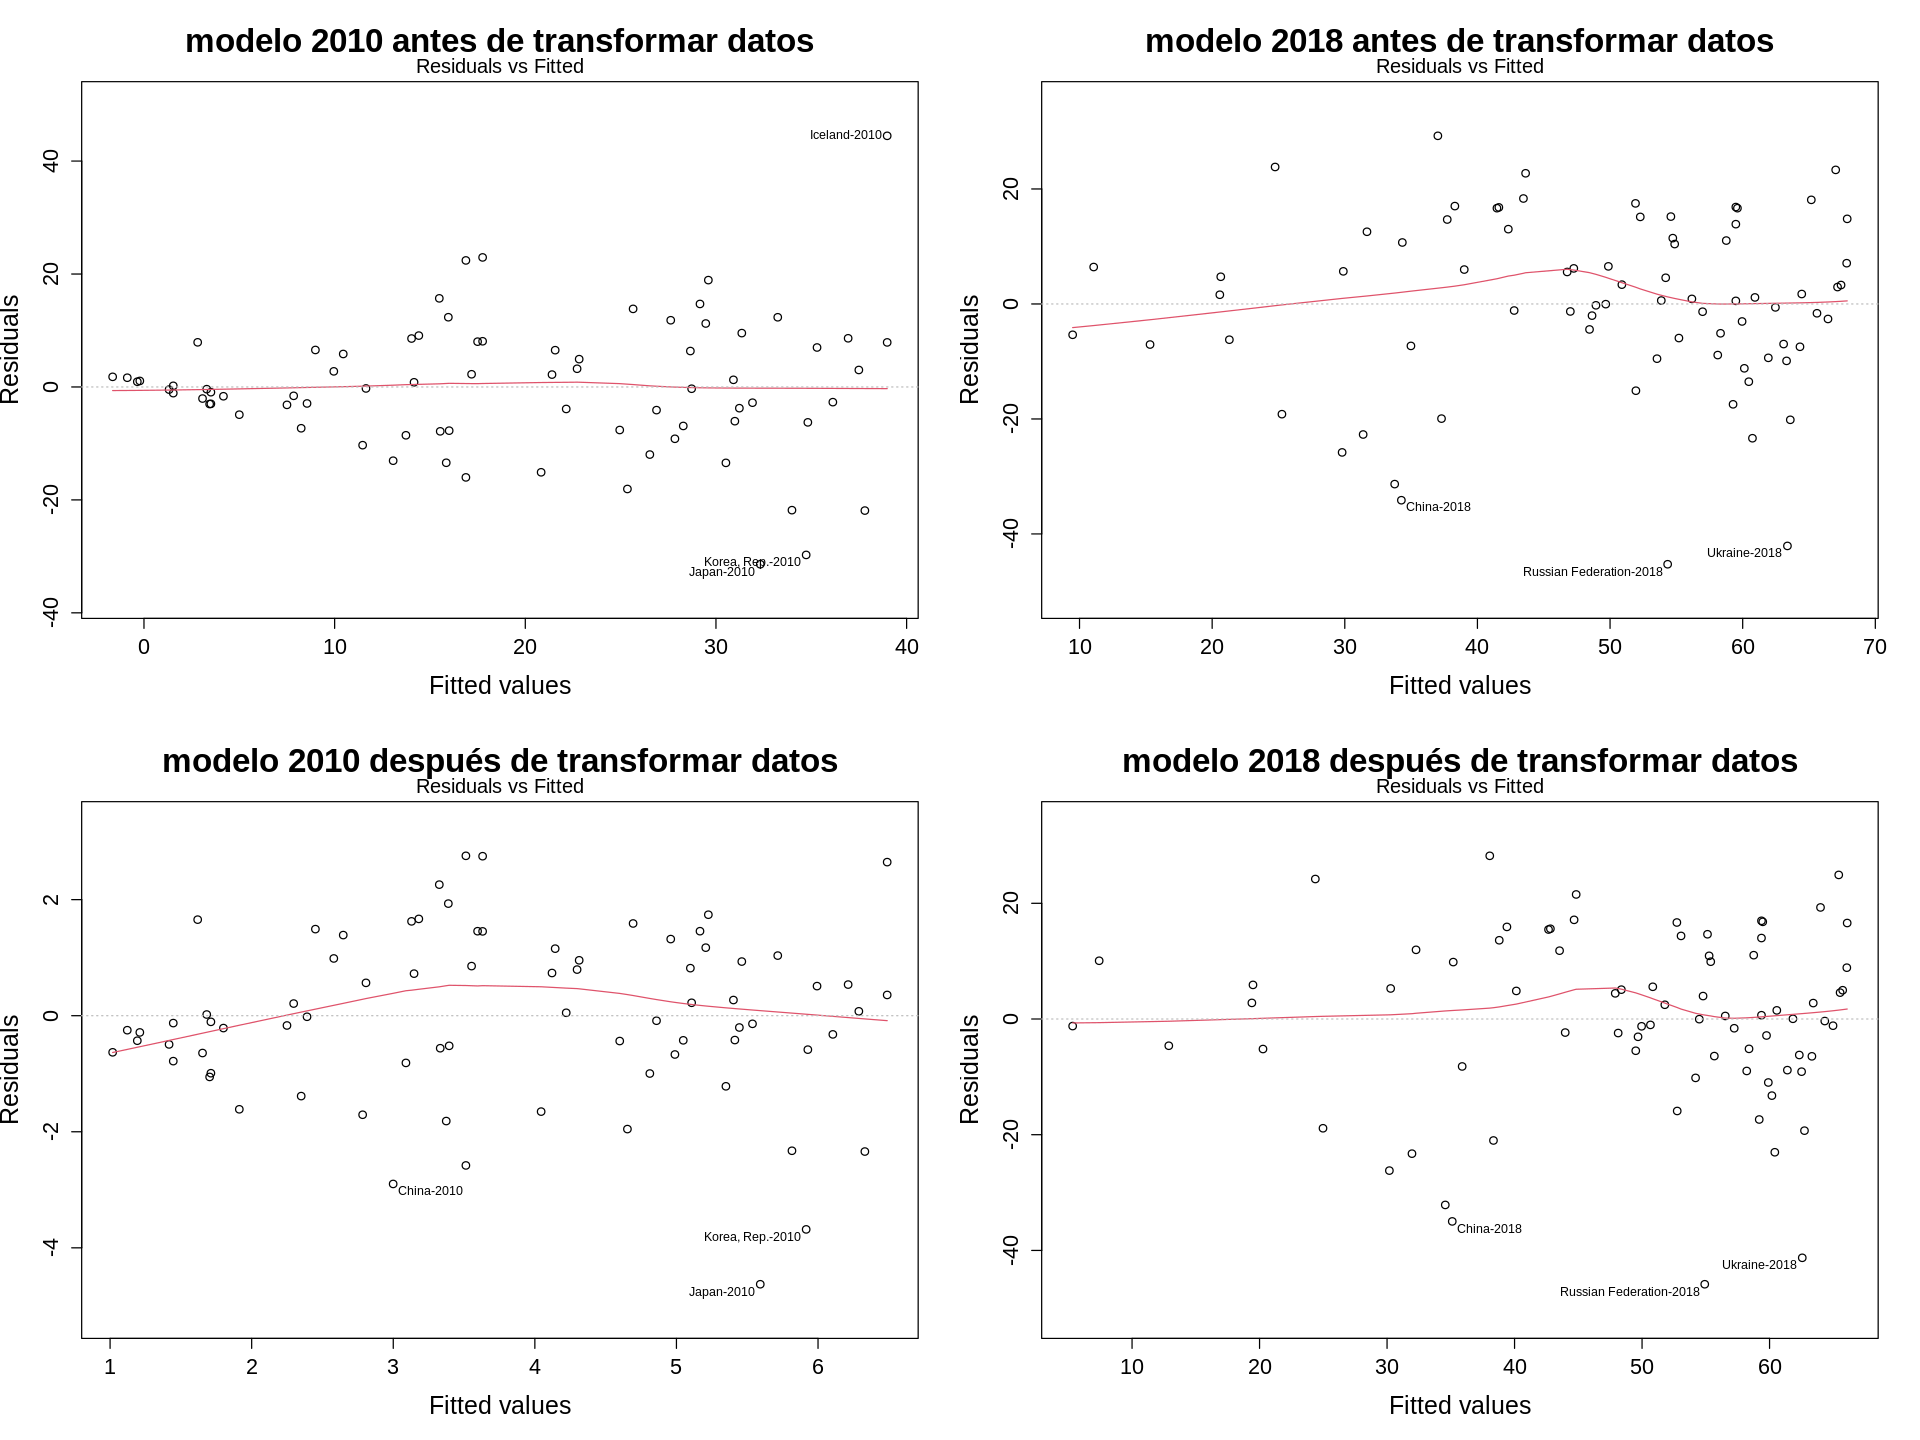

In [ ]:
#visualizar relación de los residuos del modelo en relación a los valores estimados
#comparar antes y después de transformar datos
options(repr.plot.width = 16, repr.plot.height = 12)
par(mfrow = c(2,2))
plot(modelo_2010_lm, which = 1, cex.axis = 1.3, cex.lab = 1.5, cex.main = 2, main = "modelo 2010 antes de transformar datos")
plot(modelo_2018_lm, which = 1, cex.axis = 1.3, cex.lab = 1.5, cex.main = 2, main = "modelo 2018 antes de transformar datos")
plot(modelo_2010_t_lm, which = 1, cex.axis = 1.3, cex.lab = 1.5, cex.main = 2, main = "modelo 2010 después de transformar datos")
plot(modelo_2018_t_lm, which = 1, cex.axis = 1.3, cex.lab = 1.5, cex.main = 2, main = "modelo 2018 después de transformar datos")

**COMENTARIO:**

Idealmente, de residuos vs los valores estimados del modelo no debería mostrar un patrón claro. Es decir, los residuos deberían estar dispersos aleatoriamente alrededor de 0 (que corresponde a línea de regresión lineal). Una distribución alrededor de 0 sugiere que la relación esta más próxima a ser lineal, que las varianzas son similares y que no hay ningún residuo que se comporta de forma distinta al resto (como lo es por ejemplo China en ambos años).



# **4. ¿Cuál puede ser la causa de la presencia de estos outliers en 2010? ¿Y en 2018?**

**COMENTARIO:**

Como vimos anteriormente, la distribución de valores para el porcentaje de usuarios de Facebook en el 2010 (**Facebook_por_num_2010**) tiene una asimetría positiva, es decir, hay frecuencias altas hacia el lado izquierdo de la distribución. Esto significa que la mayoría de los países tienen porcentajes de uso de Facebook por debajo de la media global. Una excepción a lo anterior es Islandia, uno de los 2 países atípicos, con un alto porcentaje de usuarios (83.45%). La otra excepción es Brasil, que al contrario del caso anterior, tiene un porcentaje de uso de redes sociales muy bajo (2.43%). Esto tiene sentido si pensamos que Islandia es un país del primer mundo donde un mayor porcentaje de su población tiene acceso a Internet (93.4% comparado a 40.7% de la población en Brasil), lo que facilita la penetración de redes sociales.

Por el contrario, hay 7 países (China, Etiopía, Nigeria, Rwanda, Uganda, Uzbekistan y Yemen) con porcentajes de uso de Facebook muy bajos en el 2018. Esto tiene sentido ya que la mayoría de estos países son del tercer mundo donde el acceso a Internet y redes sociales es limitado. De hecho, aunque el porcentaje de usuarios de Internet aumentó significativamente del 2010 al 2018, este sigue estando por debajo del 50% en todos los casos. Podemos esperar entonces que si el porcentaje de usuarios de Internet es bajo, también lo será el procentaje de usuarios de Facebook. China, por otro lado, es un caso atípico en el uso de Internet y Facebook debido a sus estrictas políticas de censura que limitan el acceso a muchos sitios web extranjeros y plataformas de redes sociales incluyendo Facebook. Sumado a esto, China tiene una población en rápido crecimiento, lo que también influye en los patrones de uso de Internet y redes sociales.

En resumen, es necesario entender el contexto de los datos para poder hacer conclusiones del uso de Facebook a nivel global durante este periodo.


# **5. A partir del plot 4 y 5 del modelo, comenta si los valores de D Cook indican la presencia de outliers con un impacto relevante (D Cook > 1), en el ajuste de la regresión.**

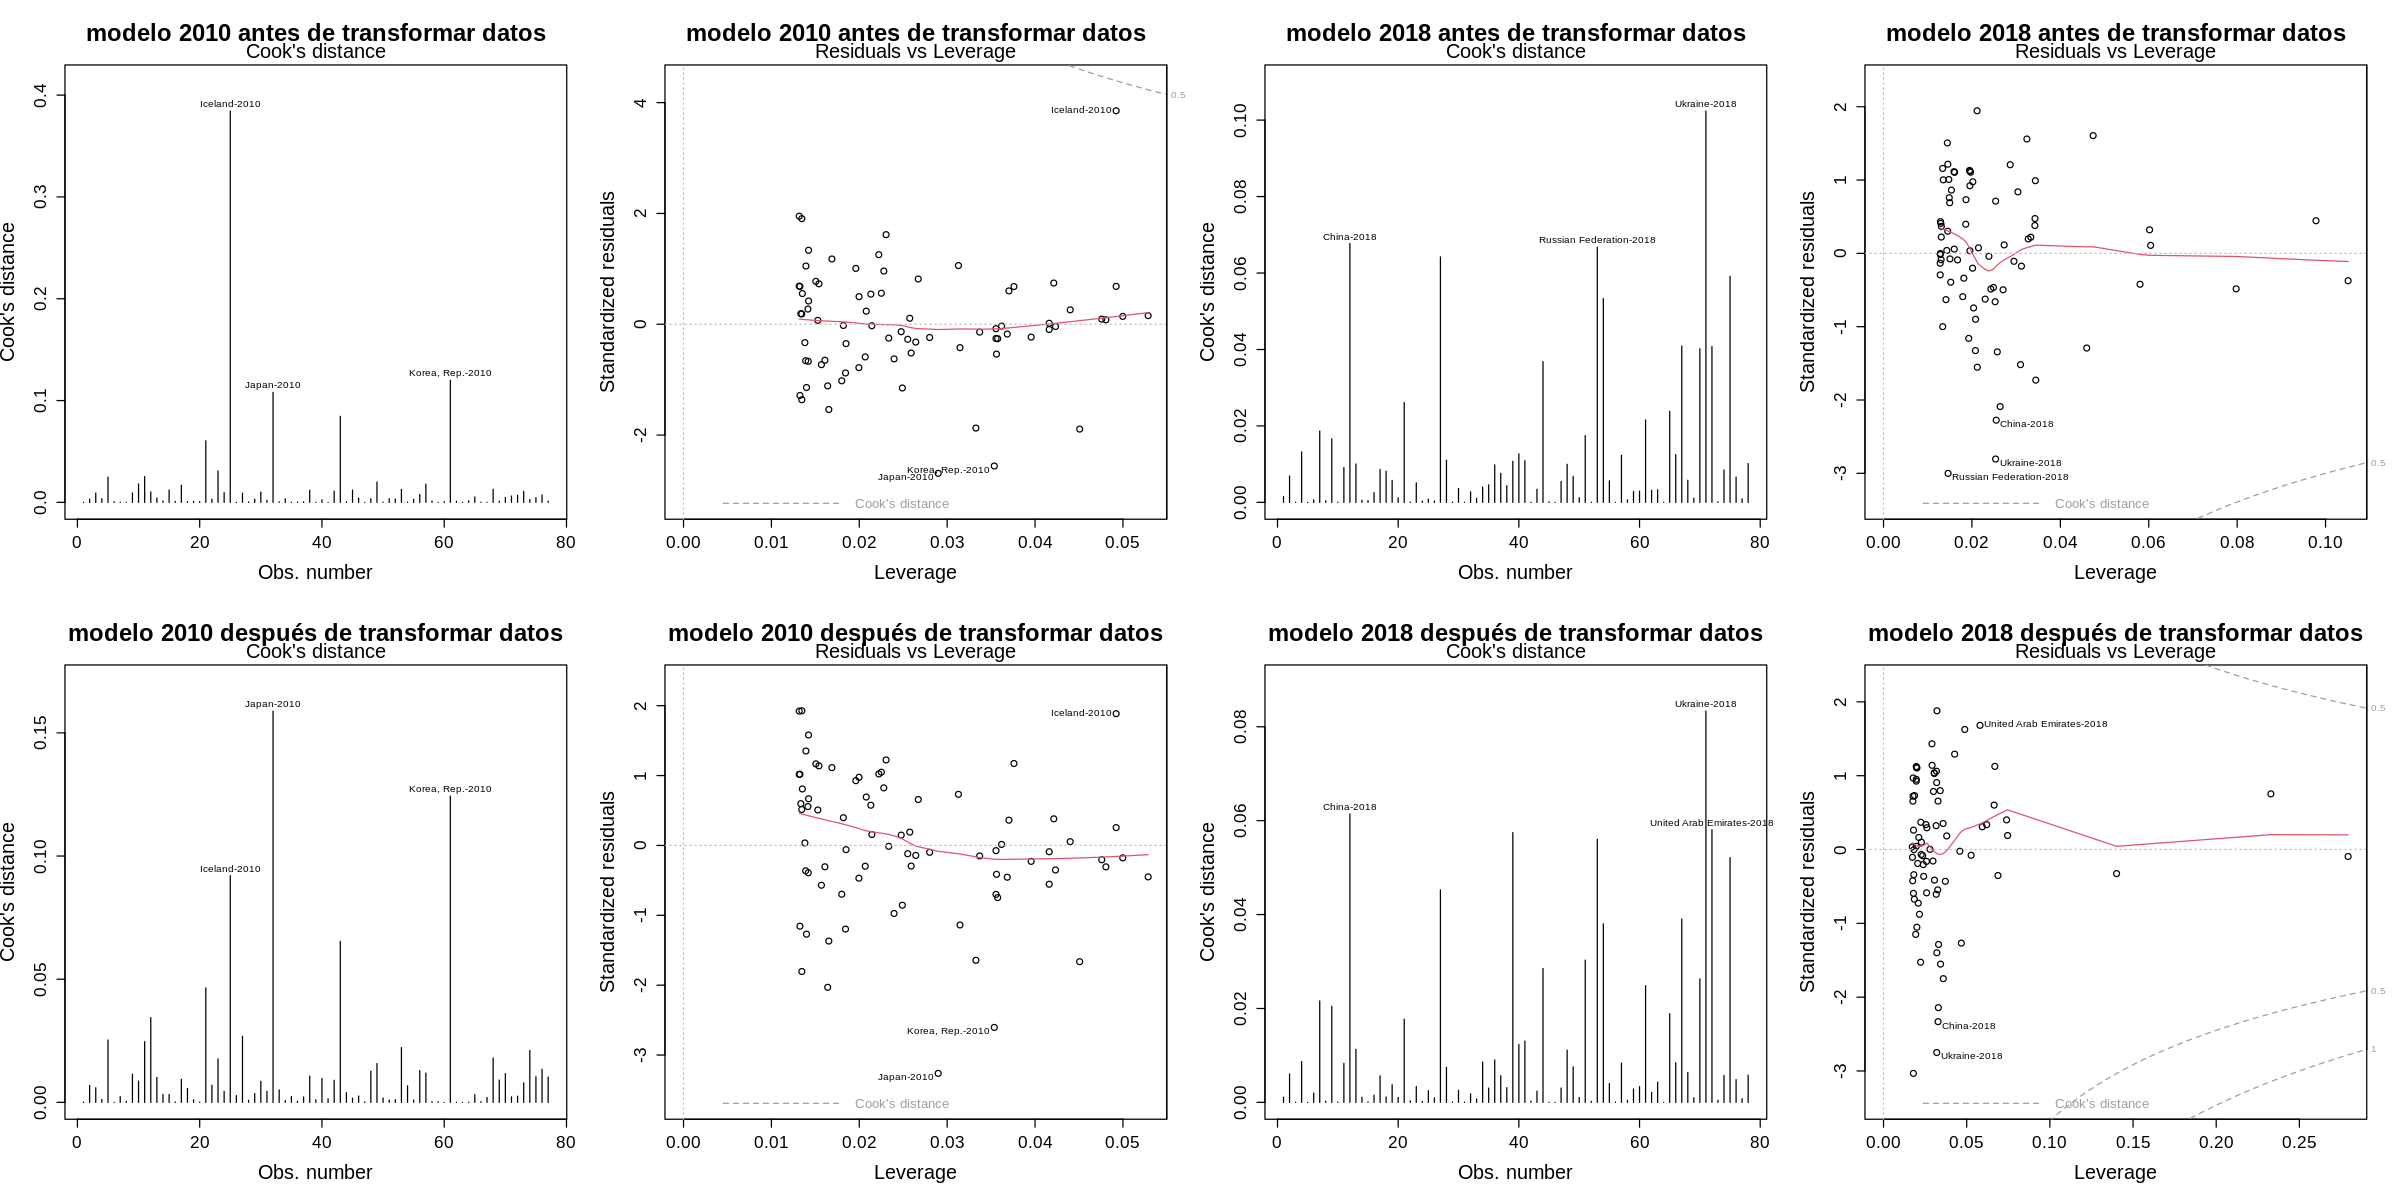

In [ ]:
#visualizar relación de los residuos tipificados y leverage, y las distancias de Cook
options(repr.plot.width = 20, repr.plot.height = 10)

par(mfrow = c(2,4))
plot(modelo_2010_lm, which = 4:5, cex.axis = 1.3, cex.lab = 1.5, cex.main = 1.8, main = "modelo 2010 antes de transformar datos")
plot(modelo_2018_lm, which = 4:5, cex.axis = 1.3, cex.lab = 1.5, cex.main = 1.8, main = "modelo 2018 antes de transformar datos")
plot(modelo_2010_t_lm, which = 4:5, cex.axis = 1.3, cex.lab = 1.5, cex.main = 1.8, main = "modelo 2010 después de transformar datos")
plot(modelo_2018_t_lm, which = 4:5, cex.axis = 1.3, cex.lab = 1.5, cex.main = 1.8, main = "modelo 2018 después de transformar datos")

**COMENTARIO:**

En general se puede notar que haber transformado los datos reduce el impacto de los outliers (todas las distancias de Cook son inferior a 1) en ambos modelos (2010 y 2018). 

En el caso de Islandia, por ejemplo, país para el cuál el porcentaje de usuarios de Facebook era muy superior a la media global en el 2010, vemos como el haber hecho una transformación de raíz cuadrada redujo la distancia respecto a otras observaciones (es decir, ya no es un valor extremos y no tiene un efecto distorsionador significativo). Observamos esto también en el gráfico de residuos tipificados y leverage, donde el residuo tipificado para este país era 4 y ahora es menos de 2 después de de la transformación. 

No obstante, a pesar de ver una mejora en el impacto de outliers, vemos que todavía hay algunos países con valores extremos que están impactando de forma significatva los coeficientes de regresión. Si quisieramos elminar este efecto no deseado, tendríamos entonces que eliminar estos valores del dataset y esto dependerá del contexto de los datos y el tipo de análisis que queramos hacer.

# **6. Ajusta, ahora, los mismos modelos que en el punto 3, utilizando la versión robusta rlm de la librería MASS (algoritmo de los M-Estimadores). Presenta la comparación de los modelos lm y rlm mediante la función stargazer y comenta si observas cambios relevantes en los coeficientes del modelo respecto al modelo lm (algoritmo de mínimos cuadrados).**

### MODELO CON DATOS INICIALES SEGÚN AÑO

In [ ]:
#modelos 2010
mod <- Facebook_por_num_2010 ~ Internet_por_num_2010

#mínimos cuadrados (lm)modelo2010_lm 
modelo_2010_lm <- lm(mod, data = anyo2010t)

#M-Estimadores (rlm)
modelo_2010_rlm <- rlm(mod, data = anyo2010t)

# Comparación de los modelos lm y rlm 2010
stargazer(modelo_2010_lm, modelo_2010_rlm, type = "text",
          title = "Comparación de modelos lineales de regresión para el 2010 antes de transformar datos",
          align = TRUE, omit.stat = c("adj.rsq", "f"))


Comparación de modelos lineales de regresión para el 2010 antes de transformar datos
                                  Dependent variable:     
                              ----------------------------
                                 Facebook_por_num_2010    
                                   OLS          robust    
                                                linear    
                                   (1)            (2)     
----------------------------------------------------------
Internet_por_num_2010            0.439***      0.446***   
                                 (0.050)        (0.045)   
                                                          
Constant                          -1.972        -2.298    
                                 (2.754)        (2.488)   
                                                          
----------------------------------------------------------
Observations                        77            77      
R2                           

In [ ]:
#modelos 2018
mod <- Facebook_por_num_2018 ~ Internet_por_num_2018

#mínimos cuadrados (lm)modelo2010_lm 
modelo_2018_lm <- lm(mod, data = anyo2018t)

#M-Estimadores (rlm)
modelo_2018_rlm <- rlm(mod, data = anyo2018t)

# Comparación de los modelos lm y rlm 2010
stargazer(modelo_2018_lm, modelo_2018_rlm, type = "text",
          title = "Comparación de modelos lineales de regresión para el 2018 antes de transformar datos",
          align = TRUE, omit.stat = c("adj.rsq", "f"))


Comparación de modelos lineales de regresión para el 2018 antes de transformar datos
                                  Dependent variable:     
                              ----------------------------
                                 Facebook_por_num_2018    
                                   OLS          robust    
                                                linear    
                                   (1)            (2)     
----------------------------------------------------------
Internet_por_num_2018            0.720***      0.723***   
                                 (0.084)        (0.083)   
                                                          
Constant                          -3.919        -3.056    
                                 (6.423)        (6.305)   
                                                          
----------------------------------------------------------
Observations                        78            78      
R2                           

**COMENTARIO**:

En ambos casos vemos que para los modelos lm, la variable **Internet_por_num** tiene un coeficiente positivo (0.439 y 0.720 para los modelos 2010 y 2018, respectivamente) y altamente significativo (p < 0.01). Esto significa que para ambos años, el porcentaje de usuarios de Facebook aumenta con el porcentaje de uso de Internet de forma significativa. El valor constante también es significativo y negativo (-1.972 y -3.919 para los modelos 2010 y 2018, respectivamente), lo que sugiere que en ausencia de usuarios de Internet, el valor esperado de usuarios de Facebook sería menor. También observamos que los modelos lm tienen un coeficiente de determinación R2 de 0.508 y 0.489. Esto significa que los modelos explican el 50.8% y 48.9% de la variabilidad en el porcentaje de usuarios de Facebook en los años 2010 y 2018, respectivamente.

En los modelos rlm, **Internet_por_num** también tiene un coeficiente positivo altamente significativo (0.446 y 0.723 para los modelos 2010 y 2018, respectivamente), lo cuál indica un efecto similar al de los modelos lm. De la misma manera, el valor de las constantes es negativo y significativo. Algo importante de notar, es que en ambos casos el error residual es un poco más bajo comparado con el error de los modelos lm.



### MODELO CON DATOS TRANSFORMADOS SEGÚN AÑO

In [ ]:
#modelos 2010
mod <- sqrt(Facebook_por_num_2010) ~ Internet_por_num_2010

#mínimos cuadrados (lm)
modelo_2010_lm_t <- lm(mod, data = anyo2010t)

#M-Estimadores (rlm)
modelo_2010_rlm_t <- rlm(mod, data = anyo2010t)

#comparación de los modelos lm y rlm 2010
stargazer(modelo_2010_lm_t, modelo_2010_rlm_t, type = "text",
          title = "Comparación de modelos lineales de regresión para el 2010 después de transformar datos",
          align = TRUE, omit.stat = c("adj.rsq", "f"))


Comparación de modelos lineales de regresión para el 2010 después de transformar datos
                                  Dependent variable:     
                              ----------------------------
                              sqrt(Facebook_por_num_2010) 
                                   OLS          robust    
                                                linear    
                                   (1)            (2)     
----------------------------------------------------------
Internet_por_num_2010            0.059***      0.063***   
                                 (0.006)        (0.006)   
                                                          
Constant                         0.974***      0.883***   
                                 (0.335)        (0.320)   
                                                          
----------------------------------------------------------
Observations                        77            77      
R2                         

In [ ]:
#modelos 2018
mod <- Facebook_por_num_2018 ~ Internet_por_num_2018 + I(Internet_por_num_2018^2)

#mínimos cuadrados (lm) 
modelo_2018_lm_t <- lm(mod, data = anyo2018t)

#M-Estimadores (rlm)
modelo_2018_rlm_t <- rlm(mod, data = anyo2018t)

#comparación de los modelos lm y rlm 2010
stargazer(modelo_2018_lm_t, modelo_2018_rlm_t, type = "text",
          title = "Comparación de modelos lineales de regresión para el 2018 después de transformar datos",
          align = TRUE, omit.stat = c("adj.rsq", "f"))


Comparación de modelos lineales de regresión para el 2018 después de transformar datos
                                  Dependent variable:     
                              ----------------------------
                                 Facebook_por_num_2018    
                                   OLS          robust    
                                                linear    
                                   (1)            (2)     
----------------------------------------------------------
Internet_por_num_2018            1.044**        1.143**   
                                 (0.504)        (0.489)   
                                                          
I(Internet_por_num_20182)         -0.002        -0.003    
                                 (0.004)        (0.004)   
                                                          
Constant                         -13.208        -14.660   
                                 (15.672)      (15.200)   
                           

**COMENTARIO:**

Después de transformar la variable dependiente (raíz cuadrada de **Facebook_por_num**) para el modelo lm del 2010, podemos ver como la relación entre el porcentaje de usuarios de Internet y Facebook se vuelve más fuerte con un valor R2 más alto. Este modelo explica un 55.9% de la variabilidad, comparado con un 50.8% del modelo anterior (sin transformar datos). Tanto el método de mínimo cuadrados (lm) como el de regresión lineal robusta (rlm) indican una relación positiva entre el porcentaje de usuarios de Internet y la raís cuadrada del porcentaje de usuarios de Facebook, con coeficientes altamente significativos (p < 0.05) para **Internet_por_num**. De la misma manera, vemos que las constantes para ambos modelos son ahora positivas (0.974 y 1,229 comparado con -1.972 y -2.298 para los modelos lm y rlm antes y despúes de transformar los datos, respectivamente). La constante en un modelo de regresión es el valor que toma la variable dependiente (**Facebook_por_num**) cuando la variable independiente (**Internet_por_num**) es cero de forma que si la constante cambia de negativa a positiva significa que la variable dependiente tiene un valor más alto en general. Finalmente, vemos que los errores residual de los modelos disminuyen significativamente (de 11.837 y 9.900 a 1.439 y 1.229 para los modelos lm y rlm antes y despúes de transformar los datos, respectivamente). 

Por otro lado, los modelos del año 2018 incluyen dos variables independientes:  **Internet_por_num** y su término al cuadrado, **I(Internet_por_num^2)**. En general, los resultados sugieren que todaviá existe una relación positiva entre el porcentaje de usuarios de Internet y Facebook, pero el término cuadrático no parece agregar mucho poder explicativo al modelo. El modelo lm estima que por cada unidad de aumento en **Internet_por_num**, **Facebook_por_num** aumenta en 1.044 (p < 0,05), mientras que el modelo rlm estima un aumento de 1.143 (p < 0,05). Aquí los coeficientes son bastante más alto comparados con los modelos anteriores (datos sin transformar), lo cuál podría sugerir que la transformación de este modelo puede capturar mejor la relación lineal entre las variables. No obtante, cuando vemos los valores del R2 y los errores estándares residuales, estos son muy similar al de los modelos anteriores. 





# **7. Propón un valor imputado para el missing observado en Taiwán en la variable Internet_por_num a partir de los modelos analizados u otro modelo nuevo ajustado a tal efecto.**

### A1. MODELO PREDICT GLOBAL

Los modelos globales se trabajo con el dataframe considerando ambos años para no perder la observación del año 2018. 
- `data`, dataframe inicial
- `df_trans`, dataframe con datos transformados según el analisis del PUNTO 3. 

#### A1_1: MODELO GLOBAL - DATOS INICIALES

In [ ]:
mod <- Facebook_por_num ~ Internet_por_num

#mínimos cuadrados (lm)
modelo_lm <- lm(mod, data = new_data)

#M-Estimadores (rlm)
modelo_rlm <- rlm(mod, data = new_data)

In [ ]:
taiwan <- subset(data, pais_r == "Taiwan")

In [ ]:
# Predicción del valor de Internet_por_num para Taiwán
taiwan <- data[data$pais == "Taiwan", ]

pred_lm <- predict(modelo_lm, newdata = taiwan, na.action = na.exclude)
pred_rlm <- predict(modelo_rlm, newdata = taiwan, na.action = na.exclude)

#valor imputado como la media de ambas predicciones
valor_pred <- mean(c(pred_lm, pred_rlm))

# Imprimir el valor predecido
cat("Pred LM:", pred_lm, "\nPred RLM:", pred_rlm,"\n")
print(valor_pred)

Pred LM: 52.59697 
Pred RLM: 53.71115 
[1] 53.15406


#### A1_2: MODELO GLOBAL - DATOS TRANSFORMADOS

In [ ]:
mod_t <- Facebook_por_num_t ~ Internet_por_num_t

#mínimos cuadrados (lm)
modelo_lm_t <- lm(mod_t, data = df_trans)

#M-Estimadores (rlm)
modelo_rlm_t <- rlm(mod_t, data = df_trans)

In [ ]:
taiwan <- subset(df_trans, pais_r == "Taiwan")

# Predicción del valor de Internet_por_num para Taiwán
taiwan <- df_trans[df_trans$pais == "Taiwan", ]
pred_lm <- predict(modelo_lm_t, newdata = taiwan)
pred_rlm <- predict(modelo_rlm_t, newdata = taiwan)

# Valor imputado como la media de ambas predicciones
valor_pred <- mean(c(pred_lm, pred_rlm))

# Imprimir el valor predecido
cat("Pred LM:", pred_lm, "\nPred RLM:", pred_rlm,"\n")
print(valor_pred)

Pred LM: 62.55879 
Pred RLM: 64.1237 
[1] 63.34125


### A2. MODELO POR AÑO

In [ ]:
#info de Taiwan 2010 datos originales
taiwan2010 <- data %>% filter(pais_r == "Taiwan" & anyo == 2010)
taiwan2010_cols <- taiwan2010[, c("pais_r", "Facebook_num", "Internet_por_num", "poblacion_num", "anyo", "Internet_num", "Facebook_por_Internet", "Facebook_por_num")]
colnames(taiwan2010_cols) <- c("pais_r", "Facebook_num_2010", "Internet_por_num_2010", "poblacion_num_2010", "anyo", 
  "Internet_num_2010", "Facebook_por_Internet_2010", "Facebook_por_num_2010")
taiwan2010_data <- rbind(anyo2010, taiwan2010_cols)
row_names <- row.names(taiwan2010_data)
row_names[length(row_names)] <- "Taiwan-2010"
row.names(taiwan2010_data) <- row_names

In [ ]:
#info de Taiwan datos transformados
anyo2010t2 <- anyo2010t
new_row <- data.frame(pais_r = "Taiwan", Facebook_num_2010 = NA, Internet_por_num_2010 = NA, poblacion_num_2010 = NA, anyo = 2010, 
  Internet_num_2010 = NA, Facebook_por_Internet_2010 = NA, Facebook_por_num_2010 = NA, Internet_por_num_2010_2 = NA, 
  log_Facebook_por_num_2010 = NA, sqrt_Facebook_por_num_2010 = NA, row.names = "Taiwan-2010")
anyo2010t2 <- rbind(anyo2010t2, new_row)
taiwan2010_data2 <- cbind(taiwan2010_data, anyo2010t2$sqrt_Facebook_por_num_2010)
colnames(taiwan2010_data2)[9] <- "sqrt_Facebook_por_num_2010"
taiwan2010_data2$sqrt_Facebook_por_num_2010[is.na(taiwan2010_data2$sqrt_Facebook_por_num_2010)] <- sqrt(taiwan2010_data2$Facebook_por_num_2010[is.na(taiwan2010_data2$sqrt_Facebook_por_num_2010)]) * 10


#### A2_1: PREDICT

In [ ]:
#modelos después de transformados
modelo_2010_lm_t  <- lm(Internet_por_num_2010 ~ sqrt_Facebook_por_num_2010, data = anyo2010t)
modelo_2010_rlm_t  <- rlm(Internet_por_num_2010 ~ sqrt_Facebook_por_num_2010, data = anyo2010t)

#predicción del valor de Internet_por_num para Taiwán 
pred_lm_t <- predict(modelo_2010_lm_t, newdata = taiwan2010_data2)
pred_rlm_t <- predict(modelo_2010_rlm_t, newdata = taiwan2010_data2)

#valor imputado como la media de ambas predicciones
mean_t <- mean(pred_lm_t["Taiwan-2010"], pred_rlm_t["Taiwan-2010"]) 

print(paste0("El valor imputado para el porcentaje de usuarios de Internet en Taiwan durante el 2010 es: ", round(mean, 2)))

[1] "El valor imputado para el porcentaje de usuarios de Internet en Taiwan durante el 2010 es: 38.45"


#### A2_2: MICE

In [ ]:
#correr mice datos transformados
mice_output_t <- mice(taiwan2010_data2[, c("sqrt_Facebook_por_num_2010", "Internet_por_num_2010")], method = "norm.boot", m = 5, maxit = 5, seed = 500) #usar regresión con bootstrapping
summary(mice_output_t)


 iter imp variable
  1   1  Internet_por_num_2010
  1   2  Internet_por_num_2010
  1   3  Internet_por_num_2010
  1   4  Internet_por_num_2010
  1   5  Internet_por_num_2010
  2   1  Internet_por_num_2010
  2   2  Internet_por_num_2010
  2   3  Internet_por_num_2010
  2   4  Internet_por_num_2010
  2   5  Internet_por_num_2010
  3   1  Internet_por_num_2010
  3   2  Internet_por_num_2010
  3   3  Internet_por_num_2010
  3   4  Internet_por_num_2010
  3   5  Internet_por_num_2010
  4   1  Internet_por_num_2010
  4   2  Internet_por_num_2010
  4   3  Internet_por_num_2010
  4   4  Internet_por_num_2010
  4   5  Internet_por_num_2010
  5   1  Internet_por_num_2010
  5   2  Internet_por_num_2010
  5   3  Internet_por_num_2010
  5   4  Internet_por_num_2010
  5   5  Internet_por_num_2010
Class: mids
Number of multiple imputations:  5 
Imputation methods:
sqrt_Facebook_por_num_2010      Internet_por_num_2010 
                        ""                "norm.boot" 
PredictorMatrix:
          

In [ ]:
mice_output_t$imp$Internet_por_num_2010 #valores imputados para Taiwan (5 imputaciones)

,1,2,3,4,5
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Taiwan-2010,43.84962,33.57046,54.53785,85.22991,62.06415


In [ ]:
fit_t <- with(mice_output_t, lm(sqrt_Facebook_por_num_2010 ~ Internet_por_num_2010))
combine_t <- pool(fit_t)
summary(combine_t) #verificar que es estadisticamente significativo

term,estimate,std.error,statistic,df,p.value
<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
(Intercept),9.8903485,3.69951285,2.673419,73.74705,9.239340e-03
Internet_por_num_2010,0.6511055,0.06689103,9.733824,73.76865,7.149109e-15


In [ ]:
values_t <- unlist(mice_output_t$imp$Internet_por_num_2010["Taiwan-2010", ])
mean_t <- mean(values_t) #calcular media de valores imputados
print(paste0("El valor imputado para el porcentaje de usuarios de Internet en Taiwan durante el 2010 es: ", round(mean, 2)))

[1] "El valor imputado para el porcentaje de usuarios de Internet en Taiwan durante el 2010 es: 38.45"


El método MICE implementa un algoritmo de imputación multivariante que crea imputaciones múltiples para estimar los valores faltantes en función de los datos observados. MICE funciona tomando cada variable con valores faltantes y crea un modelo de regresión con las otras variables del dataset. Luego, los valores faltantes se imputan utilizando los valores pronosticados de los modelos de regresión. Este proceso se repite varias veces para generar varios conjuntos de datos imputados. Los valores imputados de estos conjuntos de datos luego se combinan para crear un conjunto de datos imputado final. Una de las ventajas de MICE es que conserva la incertidumbre asociada a los valores imputados. Esto significa que los valores imputados no se tratan como valores exactos, sino como estimaciones con varianza asociada. 

 **El valor imputado para el porcentaje de usuarios de Internet en Taiwan durante el 2010 usando este método está entre 50 y 70.**

#### A2_3. MISSFOREST

In [ ]:
#correr missForest con datos transformados
df_t <- taiwan2010_data2[, -1]
taiwan_na_2010 <- missForest(df_t)
tail(taiwan_na_2010$ximp, 1)

,Facebook_num_2010,Internet_por_num_2010,poblacion_num_2010,anyo,Internet_num_2010,Facebook_por_Internet_2010,Facebook_por_num_2010,sqrt_Facebook_por_num_2010
,<int>,<dbl>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>
Taiwan-2010,6745160,61.8148,23140948,2010,13940988,47.5354,29.15,53.99074


MissForest es un método de imputación basado en machine learning. Utiliza un algoritmo de "random forest" para predecir los valores faltantes en función de los valores observados en el data set. Este método es computacionalmente eficiente y se puede utilizar en datasets grandes con muchos valores faltantes con la ventaja de que no requiere suposiciones sobre la distribución de los datos o la relación entre variables. 

**Aquí, el valor imputado para el porcentaje de usuarios de Internet en Taiwan durante el 2010 es entre 50 y 70.**

#### A2_4: AMELIA

In [ ]:
#correr Amelia datos transformados
df_t2 <- df_t[, -which(names(df_t) == "anyo")]
amelia_output_2010 <- amelia(df_t2, m = 5)

#calcular media de todos los valores imputados para Taiwan-2010
mean <- mean(amelia_output_2010$imputations[[1]]["Taiwan-2010", ]$Internet_por_num_2010,
        amelia_output_2010$imputations[[2]]["Taiwan-2010", ]$Internet_por_num_2010,
        amelia_output_2010$imputations[[3]]["Taiwan-2010", ]$Internet_por_num_2010,
        amelia_output_2010$imputations[[4]]["Taiwan-2010", ]$Internet_por_num_2010,
        amelia_output_2010$imputations[[5]]["Taiwan-2010", ]$Internet_por_num_2010)

print(paste0("El valor imputado para el porcentaje de usuarios de Internet en Taiwan durante el 2010 es: ", round(mean, 2)))

-- Imputation 1 --

  1  2  3

-- Imputation 2 --

  1  2  3

-- Imputation 3 --

  1  2

-- Imputation 4 --

  1  2

-- Imputation 5 --

  1  2

[1] "El valor imputado para el porcentaje de usuarios de Internet en Taiwan durante el 2010 es: 38.45"


Amelia es un algoritmo de imputación estocástica, estima los valores faltantes en función de los datos observados, pero también implica cierta aleatoriedad. Por lo tanto, diferentes ejecuciones de Amelia en el mismo conjunto de datos pueden producir resultados ligeramente diferentes. Cada conjunto de datos imputados se genera a partir de una muestra diferente de los datos observados, lo que contribuye a la variabilidad de los valores imputados. La variabilidad se puede reducir aumentando el número de imputaciones (parámetro m en Amelia). A medida que aumenta el número de imputaciones, los valores imputados se vuelven más estables y convergen en un conjunto estable de resultados. Es importante notar que Amelia asume una distribución de valores normal.

**En este caso el valor imputado para el porcentaje de usuarios de Internet en Taiwan durante el 2010 puede variar entre 50 y 70.**


# **8. Explica de qué forma puede ayudar el uso del Bootstrap (muestreo aleatorio simple con reemplazo) al proceso de imputación de valores faltantes como el que has propuesto en el punto anterior.**

Bootstrapping proporciona una medida de la variabilidad en los datos que se puede utilizar para estimar la incertidumbre en los valores imputados. Esto es útil en situaciones en las que hay una gran cantidad de valores faltantes ya que la imputación de valores faltantes puede ser muy sensible a la variabilidad de los datos. Bootstrapping también puede ayudar a reducir el sesgo en los valores imputados. Al crear múltiples muestras aleatorias a partir de los datos originales, se reduce el impacto de los valores atípicos y otros factores que pueden afectar la imputación de valores faltantes.


In [ ]:
#La función debe ajustar un modelo de regresión lineal y devolver el coeficiente de regresión.
regression_coef <- function(data, indices) {
  sample <- data[indices, ]
  model <- lm(Facebook_por_num_t ~ Internet_por_num_t, data = sample)
  return(summary(model)$coef[2, 1])
}

#Boostrap con los datos transformados - df_trans
bootstrap <- boot(df_trans, regression_coef, R = 1000)

#Utilizar los coeficientes de regresión generados por Bootstrap para imputar los valores faltantes de "Internet_por_num"
df_na <- data

coef_mean <- mean(bootstrap$t)*100
coef_sd <- sd(bootstrap$t)*100
imputed_values <- rnorm(sum(is.na(df_na$Internet_por_num)), mean = coef_mean, sd = coef_sd)

df_na$Internet_por_num[is.na(df_na$Internet_por_num)] <- imputed_values

taiwan <- subset(df_na, pais_r == "Taiwan")
taiwan

,pais_r,Facebook_num,Internet_por_num,poblacion_num,anyo,Internet_num,Facebook_por_Internet,Facebook_por_num
,<chr>,<int>,<dbl>,<int>,<int>,<dbl>,<dbl>,<dbl>
66,Taiwan,6745160,64.6786,23140948,2010,NA,NA,29.15
144,Taiwan,18000000,88.0000,23580080,2018,20750470,86.75,76.34


**El valor imputado para el porcentaje de usuarios de Internet en Taiwan durante el 2010 usando bootstrapping está entre 60 y 70.**

El uso de Bootstrap puede ayudar en el proceso de imputación de valores faltantes al proporcionar una estimación de la distribución de los coeficientes de regresión. En este caso, la función "`regression_coef`" se utiliza para ajustar un modelo de regresión lineal en una muestra aleatoria de datos utilizando la variable "`Facebook_por_num_t`" como variable de respuesta y "`Internet_por_num_t`" como variable explicativa. Luego, se utiliza la técnica Bootstrap para generar múltiples muestras de la muestra original, cada una de las cuales se utiliza para ajustar un modelo de regresión lineal y estimar un coeficiente de regresión.